# Init

## Utils

In [1]:
from contentScoreShareUtils import * 

# Data

## Load Data

### AEM.raw 
- stage 1 should not drop duplicate because the eventlist probably exist only on some of pdf view records

#### (bingeID Only)

In [3]:
# _dt = pd.read_csv("all_binge_data_TOP1000000_2022-10-16.csv", nrows=1000000, index_col=0)
# aem_raw = pd.read_csv("aemRaw_2022-04-21-all_fields.csv", index_col=0)

#### load all
- reason => some rows without Elq contactID will still visit asset -> so, using mcvisid to track user_journey
    - but still, the total tracking email number will not change => 35

In [59]:
# files = sorted([file for file in glob("./aem_raw/*.csv") if "aemRaw_keyColumns_2022" in file])[-4::]
# print(files)

# df = pd.DataFrame()
# for file in files:
#     current = pd.read_csv(file)
#     df = pd.concat([df, current])

['./aem_raw/aemRaw_keyColumns_20221001-20221015.csv', './aem_raw/aemRaw_keyColumns_20221015-20221031.csv', './aem_raw/aemRaw_keyColumns_20221101-20221115.csv', './aem_raw/aemRaw_keyColumns_20221115-20221130.csv']


#### prefiltering with mcvisid

In [56]:
email_mcvisid = pd.read_csv("email_mcvisid.csv")
email_mcvisid = email_cleanup(email_mcvisid, "EmailAddress").drop_duplicates()
## some string cleanup?

In [452]:
email_mcvisid

,EmailAddress,mcvisid
0,daravuth@it-anywhere.com,52836876026448603622011565556244490117
1,p.kumar@gmail.com,05289076903651073293476571393337414738
3,tonodera@aiden-net.co.jp,43277656118501184903494546147504017384
4,arshad.mehmood@spie.com,74473517763868880280357551581853310379
5,peter@yapab.com,43178188766923465540504066814247083073
...,...,...
159874,jarad.lincecum@williams.com,36133821910180952622775029789494501977
159875,mbeyer@phillipstube.com,59779735548610606900092028597429711776
159877,mark.peters@kubota.com,68934099486898397793744127563377353162
159878,ryan.dillard@gkn.com,27867921378428974691194611814599886906


In [451]:
# current.merge(EmailAddress, left_on="EmailAddress", right_on="")

In [10]:
files = sorted([file for file in glob("./aem_raw/*.csv") if "aemRaw_keyColumns_2022" in file])
stored_files = sorted([file for file in glob("./target_mcvisid/*.csv") if "aemRaw_keyColumns_2022" in file])

output_folder = "target_mcvisid"

info_list = []

for file in files:
    output_filename = file.replace("aem_raw", output_folder)
    if output_filename in stored_files:
        print(f"already processed this file {output_filename} in the target_mcvisid folder")
        continue
    current = pd.read_csv(file, nrows=None)
    keep_data = current.merge(email_mcvisid, how="inner", on="mcvisid")
    keep_data.to_csv(output_filename, index=None)
    info = [file, output_filename, current.shape[0], keep_data.shape[0]]
    info_list.append(info)
    print(f"{output_filename}, original rows {current.shape[0]} --> keep rows:  {keep_data.shape[0]}")
    
del keep_data    
#     info_list_df = pd.DataFrame(info_list, columns = ["Raw_file", "Clean_file", "Original_rows", "Keep_rows"])
#     info_list_df.to_excel("export_info.xlsx")

./target_mcvisid/aemRaw_keyColumns_20220401-20220415.csv, original rows 5584815 --> keep rows:  1503788
./target_mcvisid/aemRaw_keyColumns_20220415-20220430.csv, original rows 5235230 --> keep rows:  1575891
./target_mcvisid/aemRaw_keyColumns_20220501-20220515.csv, original rows 5495277 --> keep rows:  1976563
./target_mcvisid/aemRaw_keyColumns_20220515-20220531.csv, original rows 6413570 --> keep rows:  2215833


/Users/wy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10,11,12,13,20,22,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


./target_mcvisid/aemRaw_keyColumns_20220601-20220615.csv, original rows 5490207 --> keep rows:  1949106
./target_mcvisid/aemRaw_keyColumns_20220615-20220630.csv, original rows 2997171 --> keep rows:  1146943
./target_mcvisid/aemRaw_keyColumns_20220701-20220715.csv, original rows 4322589 --> keep rows:  1537757
./target_mcvisid/aemRaw_keyColumns_20220715-20220731.csv, original rows 3680306 --> keep rows:  1272473
./target_mcvisid/aemRaw_keyColumns_20220801-20220815.csv, original rows 4565584 --> keep rows:  1550335
./target_mcvisid/aemRaw_keyColumns_20220815-20220831.csv, original rows 8746625 --> keep rows:  2931668
./target_mcvisid/aemRaw_keyColumns_20220901-20220915.csv, original rows 7084004 --> keep rows:  2379684
./target_mcvisid/aemRaw_keyColumns_20220915-20220930.csv, original rows 7222517 --> keep rows:  2473647
./target_mcvisid/aemRaw_keyColumns_20221001-20221015.csv, original rows 6240070 --> keep rows:  2168738
./target_mcvisid/aemRaw_keyColumns_20221015-20221031.csv, origin

In [25]:
info_list_df = pd.read_excel("export_info-20221207.xlsx", index_col=0)
# info_list_df.to_excel("export_info-20221207.xlsx")
info_list_df["Keep_ratio"] = info_list_df["Keep_rows"]/info_list_df["Original_rows"]
info_list_df

,Raw_file,Clean_file,Original_rows,Keep_rows,Keep_ratio
0,./aem_raw/aemRaw_keyColumns_20220401-20220415.csv,./target_mcvisid/aemRaw_keyColumns_20220401-20...,5584815,1503788,0.269264
1,./aem_raw/aemRaw_keyColumns_20220415-20220430.csv,./target_mcvisid/aemRaw_keyColumns_20220415-20...,5235230,1575891,0.301017
2,./aem_raw/aemRaw_keyColumns_20220501-20220515.csv,./target_mcvisid/aemRaw_keyColumns_20220501-20...,5495277,1976563,0.359684
3,./aem_raw/aemRaw_keyColumns_20220515-20220531.csv,./target_mcvisid/aemRaw_keyColumns_20220515-20...,6413570,2215833,0.345491
4,./aem_raw/aemRaw_keyColumns_20220601-20220615.csv,./target_mcvisid/aemRaw_keyColumns_20220601-20...,5490207,1949106,0.355015
5,./aem_raw/aemRaw_keyColumns_20220615-20220630.csv,./target_mcvisid/aemRaw_keyColumns_20220615-20...,2997171,1146943,0.382675
6,./aem_raw/aemRaw_keyColumns_20220701-20220715.csv,./target_mcvisid/aemRaw_keyColumns_20220701-20...,4322589,1537757,0.355749
7,./aem_raw/aemRaw_keyColumns_20220715-20220731.csv,./target_mcvisid/aemRaw_keyColumns_20220715-20...,3680306,1272473,0.345752
8,./aem_raw/aemRaw_keyColumns_20220801-20220815.csv,./target_mcvisid/aemRaw_keyColumns_20220801-20...,4565584,1550335,0.339570
9,./aem_raw/aemRaw_keyColumns_20220815-20220831.csv,./target_mcvisid/aemRaw_keyColumns_20220815-20...,8746625,2931668,0.335177


In [39]:
info_list_df.describe().applymap(lambda x: str(round(x,6)))

,Original_rows,Keep_rows,Keep_ratio
count,16.0,16.0,16.0
mean,5991883.75,1995493.75,0.335584
std,1616437.930158,515951.065445,0.026819
min,2997171.0,1146943.0,0.269264
25%,5067818.5,1547190.5,0.326319
50%,5912442.5,2072650.5,0.34103
75%,7118632.25,2387373.75,0.349416
max,8746625.0,2931668.0,0.382675


#### load partial from local

In [43]:
stored_files = sorted([file for file in glob("./target_mcvisid/*.csv") if "aemRaw_keyColumns_2022" in file])
df = pd.DataFrame()
for file in stored_files:
    current = pd.read_csv(file)
    df = pd.concat([df, current])
    print("current rows: ", df.shape[0])

current rows:  1503788
current rows:  3079679
current rows:  5056242
current rows:  7272075


/Users/wy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10,11,12,13,22,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


current rows:  9221181


/Users/wy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (22,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


current rows:  10368124
current rows:  11905881
current rows:  13178354
current rows:  14728689
current rows:  17660357
current rows:  20040041
current rows:  22513688
current rows:  24682426
current rows:  26922968
current rows:  29517457
current rows:  31927900


In [45]:
aem_raw = df

#### parsing

In [130]:
stage1_raw = aem_raw.dropna(subset=["BingeScoredAssetPath"]).reset_index(drop=True)
# stage1_raw = stage1_raw.drop_duplicates(subset=["DateTime_UTC", "EloquaContactId", "SessionVisitorId", "BingeScoredAssetPath"], keep='last') 

stage2_raw = aem_raw.dropna(subset=["BingeScoredAssetPath"]).reset_index(drop=True)
# stage2_raw = stage2_raw.drop_duplicates(subset=["DateTime_UTC", "SessionVisitorId", "BingeScoredAssetPath"], keep='last')
stage2_raw = email_cleanup(stage2_raw, "EmailAddress")
print("stage1_raw: unique SessionVisitorId: ", stage1_raw["SessionVisitorId"].unique().shape)
print("stage2_raw: unique mcvisid: ", stage2_raw["mcvisid"].unique().shape)

stage1_raw: unique SessionVisitorId:  (624,)
stage2_raw: unique mcvisid:  (460,)


### crm Lead
- unique EloquaContactId -> do some update on this table for the same ID

In [47]:
_lead = pd.read_csv("crm_Lead_20221116_all.csv", index_col=0)
crm_lead = email_cleanup(_lead, "emailaddress1")

/Users/wy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,9,13,15,17,31,43,44,45,46,49,50,51,56,58,59,63,64,68,70,72,74,76,78,81,83,84,85,89,92,94,97,99,109,112,113,114,115,117,124,135,136,137,138,140,142,143,144,145,157,159,164,165,166,167,178,182,185,188,198,200,204,207,208,216,217,219,223,224,229,230,232,238,240,246,247,252,253,256,257,258,261,262,266,267,268,272,274,275,284,286,287,289,293,294,307,311,313) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/wy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilo

### elo.contact
- from gated content form?
- unique EloquaContactId -> do some update on this table for the same ID

In [454]:
_elq = pd.read_csv("all_elo_data_TOP1000000_2022-10-16.csv", nrows=1000000, index_col=0)
# _elq = pd.read_csv("elq_all_bridge-only.csv", index_col=0)
# elq = email_cleanup(_elq, "EmailAddress")
# elq_bridge = elq[["EmailAddress", "EloquaContactId"]]


/Users/wy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,48,49,50,51,52,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,84) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
# elq_bridge.groupby("EmailAddress").size().sort_values()

# Ideas
- business targets
    1. attractness: provide more interesting content for users
        - ranking content + recommendation based
    2. engagement: reach out and prioritize on target users
        - identify potential lead, find patterns and build segmentations between users based on their upload informaton
            - website visiting records -> AEM.raw? <font color=red>need specialized and ingested related data...</font>
            - interactions with sales people -> CRM.Lead? <font color=red>need clean, maintain and more explaination on the existing data... </font>
            - their demographic information -> CRM.Lead / Elq.Contact (this is quite clean)
    3. conversion: sales people effort?
    4. retain: ...

- questions
    - `Next steps: use data that is going into content scoring to predict user propensity`
    - how this weight score can help next step for potential lead prediction?
        - treat it as an feature to another model? the distance between sample is more important. It should be separatable.
        - two-stage model? or just change labels
        
- reference:
    - e.g. in recommendation system
    - <img src="https://assets.zilliz.com/2_29e27eb9b1.png" width="400"/>
    - <img src="https://cdn-images-1.medium.com/max/800/0*U5iR5NTSChuSOcyc." width="400"/>

### funnel

<div>
    <img src="https://www.wordstream.com/wp-content/uploads/2022/08/content-marketing-funnel-full-size.png" width="500"/>
</div>
    

# Feature Engineering


## Preprocessing - TF-IDF (NLP)

- TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)
    - idf(t) = log(N/(df + 1))
        <img src="https://cdn-media-1.freecodecamp.org/images/1*q3qYevXqQOjJf6Pwdlx8Mw.png" width="500"/>
        <img src="https://preview.redd.it/clwuxvtqpeq91.png?width=397&format=png&auto=webp&s=ae6788cefae9b83b3033db3612ec83e8f5ded24f" width="500"/>
    - rather directly using count frequency in the naive bayesian, using TF-IDF to adjust the features
    
- preprocessing.StandardScaler()
    - should not use because the features importance are dependent on the frequency, which is already kind of information

## stage1: wrapping data
- label: Submitted gated form (target)
    - generated by EventList
- features:
    - choosed:
        - BingeScoredAssetPath: Current BingeScoredAssetPath interaction on one session ( content sequence )
        - DateTime_UTC -> for concat sequence in visited order
    - possible:
        - BingeScoredAssetScore = manually set -> importance level for sales people
        - BingeCriticalScore = manually threshold -> initial threshold for sales people
        - PageURL? what information this URL can bring into model?
        
- original asset score manual setup ideas:
    - asset weight average is 1, if it is more important/meaningful -> bump up to 2;
    - if there are 5 assets in total, then default basic threshold is 5

## stage2: wrapping data
- label: is qualified lead or not (target)
    - stored on CRM Lead table, marked by sales people
- features: all the activities during the journey -> including asset browsing history 
    - choosed:
        - BingeScoredAssetPath: Current BingeScoredAssetPath interaction on one session ( content sequence )
        - DateTime_UTC -> for concat sequence in visited order
    - possible:
        - User information <font color=red>(this part are useful)</font>
            - industry
            - company size 
            - ...

In [57]:
SEP_TOKEN_PATTERN = "[^\$]+"
SEED = 42
TEST_SIZE = 0.2

# Modeling



## Stage-1: Scoring content - visitor preference 
- rethink:
    - what is the most attractive content for visitor v.s. what is the most attractive content for salespeople?
        - SubmitGatedForm action is not marked by sales people, it's kind of inclination level from user side
        - the model is trying to know which asset is more important for SubmitGatedForm 
        - how important for user to submit GCDC

    - weight should be from sales people definition, but current method can only get the attractive score on visitor aspect => 
        - assumption-1: more clicks => interesting to connect? <font color=red>submit GCDC == made a reach out decision? YES?</font>
        - they will think the information are valuable for them, want to get more related information -> salespeople reach out? When is the time = threshold?

In [58]:
data = stage1_raw.groupby("SessionVisitorId").apply(lambda x: preprocessing_stage(x))

### Data split + TFIDF
<!-- 
# ## outdated
# data = stage1_raw.groupby("SessionVisitorId").apply(lambda x: processing_stage1(x, target_method=1, feature_method="bow"))
# data["submitted_form"].value_counts()

# def tfidf_transform(dtm, idf=None):
#     N = dtm.shape[0] # number of document
#     tf = (dtm/(dtm.sum(axis=1).reshape(-1,1)))

#     if idf is None:
#         idf = np.log(1 + N/(dtm.astype(bool).sum(axis=0)))
        
#     tfidf = tf * idf
#     return tfidf, idf
# v = DictVectorizer(sparse=False)
# X_train_dtm = v.fit_transform(X_train)
# X_test_dtm = v.transform(X_test)
# X_train_arr, idf = tfidf_transform(X_train_dtm)
# X_test_arr, _ = tfidf_transform(X_test_dtm, idf) -->

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data["features"], data["label"].values, test_size=TEST_SIZE, stratify=data["label"].values, random_state=SEED)

print("training sample label size:", Counter(y_train))
print("pos vs neg in training set:")
print(data["label"].value_counts())
print("testing sample label size:", Counter(y_test))

vectorizer = TfidfVectorizer(token_pattern=SEP_TOKEN_PATTERN)

X_train_arr = vectorizer.fit_transform(X_train)
X_test_arr = vectorizer.transform(X_test)

training sample label size: Counter({1: 304, 0: 195})
pos vs neg in training set:
1    380
0    244
Name: label, dtype: int64
testing sample label size: Counter({1: 76, 0: 49})


### Models

#### LR

In [61]:
model = LogisticRegression()
model.fit(X_train_arr, y_train)
# model.coef_

LogisticRegression()

#### svm (x)
- no weight but only predict prob 

              precision    recall  f1-score   support

           0       0.52      0.45      0.48        49
           1       0.67      0.74      0.70        76

    accuracy                           0.62       125
   macro avg       0.60      0.59      0.59       125
weighted avg       0.62      0.62      0.62       125



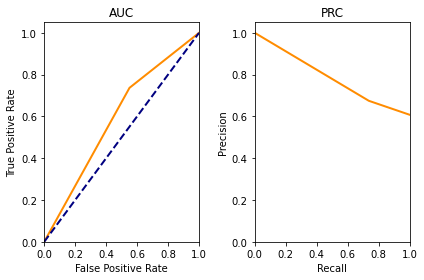

AUC: 59.29%, PRC: 78.58%


In [62]:
svm_clf = svm.SVC(kernel='linear', C=1)
svm_clf.fit(X_train_arr, y_train)
y_pred = svm_clf.predict(X_test_arr)
evaluate_metrics(y_test, y_pred, show_plots = True)

#### naive bayes
- $\theta_{yi}$ is the probability $P(x_i \mid y)$ of feature i appearing in a sample belonging to class y.

              precision    recall  f1-score   support

           0       0.52      0.49      0.51        49
           1       0.68      0.71      0.70        76

    accuracy                           0.62       125
   macro avg       0.60      0.60      0.60       125
weighted avg       0.62      0.62      0.62       125



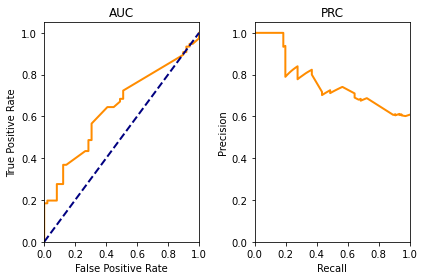

AUC: 64.14%, PRC: 76.56%


In [63]:
clf = MultinomialNB().fit(X_train_arr, y_train)
asset_prob = np.exp(clf.feature_log_prob_[0])
# clf.feature_log_prob_[0]
y_pred = (clf.predict_proba(X_test_arr))[:, 1]
evaluate_metrics(y_test, y_pred, show_plots = True)

### <font color=red>cross validation</font>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500"/>

In [64]:
scores = cross_validate(clf, X_train_arr, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores["test_score"].mean(), scores["test_score"].std()))

0.63 accuracy with a standard deviation of 0.04


### Assign Weight (kind of user preference)
- conditional prob

In [65]:
# log p(w|c=1) + log p(w|c=0)
asset_prob = np.exp(clf.feature_log_prob_[0])

In [66]:
weights = pd.DataFrame([vectorizer.get_feature_names(), asset_prob.tolist()]).T
weights.columns = ["asset", "weight"]
weights.sort_values(by="weight", ascending=False).style

,asset,weight
8,/content/dam/rockwell-automation/sites/downloads/pdf/getting started in iab.pdf,0.258224
32,/content/dam/rockwell-automation/videos/events/af-2022/on-demand/new-and-next-at-rockwell-automation/new-and-next-at-rockwell-automation-en.mp4,0.115254
9,/content/dam/rockwell-automation/sites/downloads/pdf/project design assistant.pdf,0.108881
7,/content/dam/rockwell-automation/sites/downloads/pdf/generating a report.pdf,0.081843
10,/content/dam/rockwell-automation/sites/downloads/pdf/using the architecture view.pdf,0.056549
5,/content/dam/rockwell-automation/sites/downloads/pdf/auto-sp010_-en-p.pdf,0.038023
6,/content/dam/rockwell-automation/sites/downloads/pdf/export a bom to proposalworks.pdf,0.037494
3,/content/dam/rockwell-automation/sites/downloads/pdf/applying pricing to bom.pdf,0.024686
43,/content/dam/rockwell-automation/videos/products/software/factorytalk/factorytalk-optix-visualization-platform-introduction/factorytalk-optix-visualization-platform-introduction-en.mp4,0.017014
13,/content/dam/rockwell-automation/videos/capabilities/cybersecurity/cybersecurity-watch-a-hack-in-real-time/cybersecurity-hack-in-real-time-en.mp4,0.015086


## Stage-2: Potential Lead - Sales people aspect
- with the label from sales people
    - type-1: interaction on Binge within lead status promote time range (30 days)
    - type-2: is existed qualified lead or not 
- conversion transition (which stage of conversion)
    - reading asset A has higher probably to become a existing lead compared with reading asset B
- assumption
    - <font color=red>only consider people already shows their interest in the funnel (only elq ID exist)</font>. So, this is kind of stage2 filter.
        - stage1 filter will consider anonomys visitors, and make them keep interest and leave information in elq first 
    - potential lead will have the similar interaction patterns as existing lead

### tables relationship
```SQL
FROM aem.RawTraffic AS binge 
    LEFT JOIN elo.Contact AS contact ON binge.EloquaContactId = contact.EloquaContactId
    LEFT JOIN crm.Lead AS lead ON lead.emailaddress1 = contact.EmailAddress
```
- relationship
    - elq is the bridge table 
        - elq ID : Email = <font color=red>N</font>:1 
        - overwrite
    - crm_lead
        - account id : Email = 1:N 
        - add new row
    - stage2_raw
        - session id : elq ID = 1:1
        - add new row
        - mvcid : elq ID = 1:N

#### email to mcvisid

In [69]:
# email_to_mcvisid = elq_bridge[["EmailAddress", "EloquaContactId"]].merge(stage2_raw[["EloquaContactId", "mcvisid"]].drop_duplicates(), on="EloquaContactId")
# email_to_mcvisid = email_to_mcvisid[["EmailAddress", "mcvisid"]].drop_duplicates()

email_to_mcvisid = pd.read_csv("email_mcvisid.csv")
email_to_mcvisid = email_cleanup(email_to_mcvisid, "EmailAddress").drop_duplicates()

### positive signal
1. method A: within a month & the statuscodename change from unQualified to Qualified
    1. ra_leadstage increase 1
2. <font color=red>method B: identify all the existing lead, find the visitor has the similar pattern on binge asset</font>

In [22]:
# elq_bridge.groupby("EmailAddress").size().sort_values()

In [70]:
crm_qualify_label = crm_lead.groupby("emailaddress1").apply(lambda user_journey: identify_pos(user_journey, label_type = 2))
crm_qualify_label = crm_qualify_label.to_frame().reset_index()
crm_qualify_label.columns = ["emailaddress1", "label"]
crm_qualify_label.label.value_counts()

False    133201
True       1951
Name: label, dtype: int64

In [116]:
1951/(1951+133201)

0.014435598437315024

In [72]:
# email_to_label = email_to_mcvisid.merge(crm_qualify_label, left_on=["EmailAddress"], right_on=["emailaddress1"], how='inner')
# email_to_label = email_to_label[["EmailAddress","label", "mcvisid"]].drop_duplicates(subset=["mcvisid"]) 
# # assert email_to_label.groupby("EmailAddress").size().sort_values()[-1] == 1 # EmailAddress 1: N mcvisid
# print("keep rows:", email_to_label.shape)
# # email_to_label.groupby("mcvisid").size() # should have samples that larger than 2

# _data = stage2_raw.merge(email_to_label, on="mcvisid")

In [131]:
crm_lead["emailaddress1"].sample(50)

95942.0                          trevor.rayl@actsc.com
234503.0                christian.felcmann@endress.com
71708.0                  ravi.teja@affineanalytics.com
183249.0                     alejandro.chandia@ypf.com
108800.0                        daniramirezm@gmail.com
180557.0                  jf02102006@comunidad.unam.mx
137967.0                 bijackewicz@northshorewrd.org
6444.0                           saljabr@aljabr.com.sa
62368.0                             ksaesow@cclind.com
127751.0                     caycock@solconnetwork.com
65814.0                          hfisker@fiskerinc.com
173768.0                          m.riggio@sipac.pr.it
160979.0                        bruno.orfei@aryzta.com
174039.0                       asapnu@dscontainers.com
208538.0                            goedderz@neumag.de
87631.0                       venkateshnccbm@gmail.com
48296.0                    christina.akleh@hotmail.com
15273.0               jstromstad@conceptsystemsinc.com
70281.0   

In [132]:
stage2_raw["EmailAddress"].sample(50)

9327                       brycep@dmcinfo.com
2029                      rodney.wong@mts.com
34310                   bell.bay@riotinto.com
9742                  nbellemore@rekointl.vom
2946                    haynesjacob@bfusa.com
12605                       noemail@email.com
21539                       t.bidet@packr.com
1670                  michel@petrocontrols.nl
20985                 controles@proscoint.com
38002                hubert.chin@sigsauer.com
46048             hstoppa@rtengenharia.ind.br
35517                        dpilt@nhp.com.au
38150                     aroberts@ectpac.com
42171                        alnaqa@gmail.com
37100                       lswilson@oldi.com
48997               sanjeev.saini@pepsico.com
46932             hstoppa@rtengenharia.ind.br
40183                     cruzmontes.o@pg.com
43623                    tgarnett@malisko.com
10004                 kristen.roegner@ofd.com
18106            matt_vogel@premierenergy.com
40092                jkong@wpjk.in

In [134]:
_data = stage2_raw.merge(crm_qualify_label, left_on=["EmailAddress"], right_on=["emailaddress1"], how='inner')
data = _data.groupby("EmailAddress").apply(lambda x: preprocessing_stage(x, stage=2))

### Data split + TFIDF

In [137]:
X_train, X_test, y_train, y_test = train_test_split(data["features"], data["label"].values, test_size=TEST_SIZE, stratify=data["label"].values, random_state=SEED)
print("total:\n", data["label"].value_counts())
print("training sample label size:", Counter(y_train))
print("pos vs neg in training set:")
print("testing sample label size:", Counter(y_test))

vectorizer = TfidfVectorizer(token_pattern=SEP_TOKEN_PATTERN)

X_train_arr = vectorizer.fit_transform(X_train)
X_test_arr = vectorizer.transform(X_test)

total:
 0    83
1     6
Name: label, dtype: int64
training sample label size: Counter({0: 66, 1: 5})
pos vs neg in training set:
testing sample label size: Counter({0: 17, 1: 1})


### Models

In [138]:
clf = MultinomialNB().fit(X_train_arr, y_train)
y_pred = (clf.predict_proba(X_test_arr))[:, 1]
asset_prob = np.exp(clf.feature_log_prob_[0])

In [139]:
weights = pd.DataFrame([vectorizer.get_feature_names(), asset_prob.tolist()]).T
weights.columns = ["asset", "weight"]
weights.sort_values(by="weight", ascending=False).style

,asset,weight
22,/content/dam/rockwell-automation/videos/events/af-2022/on-demand/new-and-next-at-rockwell-automation/new-and-next-at-rockwell-automation-en.mp4,0.154958
4,/content/dam/rockwell-automation/sites/downloads/pdf/getting started in iab.pdf,0.134275
19,/content/dam/rockwell-automation/videos/capabilities/process-solutions/plantpax-system-now-and-in-the-future/plantpax-system-now-and-in-the-future-en.mp4,0.077066
7,/content/dam/rockwell-automation/videos/capabilities/cybersecurity/cip-security-improve-your-control-system-defense-in-depth-strategy/cip-security-improve-your-control-system-defense-in-depth-strategy-en.mp4,0.045136
5,/content/dam/rockwell-automation/sites/downloads/pdf/project design assistant.pdf,0.044605
2,/content/dam/rockwell-automation/sites/downloads/pdf/export a bom to proposalworks.pdf,0.043241
0,/content/dam/rockwell-automation/sites/downloads/pdf/applying pricing to bom.pdf,0.040011
28,/content/dam/rockwell-automation/videos/products/software/factorytalk/factorytalk-design-studio-cloud-increase-design-efficiency/factorytalk-design-studio-cloud-increase-design-efficiency-en.mp4,0.031174
6,/content/dam/rockwell-automation/sites/downloads/pdf/using the architecture view.pdf,0.028013
3,/content/dam/rockwell-automation/sites/downloads/pdf/generating a report.pdf,0.026770


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.00      0.00      0.00         1

    accuracy                           0.94        18
   macro avg       0.47      0.50      0.49        18
weighted avg       0.89      0.94      0.92        18



/Users/wy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


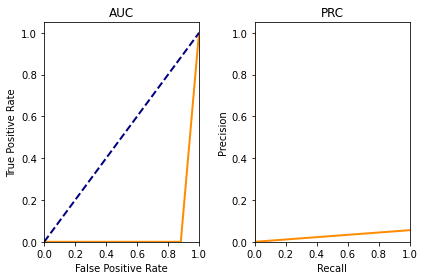

AUC: 5.88%, PRC: 2.78%


In [140]:
evaluate_metrics(y_test, y_pred, show_plots = True)

In [141]:
# weights["weight"]/weights["weight"].mean()

## Correlation

,y
/content/dam/rockwell-automation/sites/downloads/pdf/getting started in iab.pdf,-0.139450
/content/dam/rockwell-automation/videos/capabilities/process-solutions/plantpax-system-now-and-in-the-future/plantpax-system-now-and-in-the-future-en.mp4,-0.103993
/content/dam/rockwell-automation/videos/capabilities/cybersecurity/cip-security-improve-your-control-system-defense-in-depth-strategy/cip-security-improve-your-control-system-defense-in-depth-strategy-en.mp4,-0.071130
/content/dam/rockwell-automation/sites/downloads/pdf/export a bom to proposalworks.pdf,-0.067173
/content/dam/rockwell-automation/sites/downloads/pdf/applying pricing to bom.pdf,-0.066254
/content/dam/rockwell-automation/videos/capabilities/industrial-networks/fundamentals-of-ethernet-ip-iiot-network-technology/fundamentals-of-ethernet-ip-iiot-network-technology-en.mp4,-0.056174
/content/dam/rockwell-automation/videos/capabilities/mes-solutions/overview-of-plex-systems-smart-manufacturing-platform/overview-of-plex-systems-smart-manufacturing-platform-en.mp4,-0.049977
/content/dam/rockwell-automation/videos/capabilities/industrial-automation-and-control/micro-control-integrated-automation-solution/micro-control-integrated-automation-solution-en.mp4,-0.049707
/content/dam/rockwell-automation/videos/capabilities/process-solutions/process-control-what-is-new-and-next/process-control-new-and-next-en.mp4,-0.047110
/content/dam/rockwell-automation/sites/downloads/pdf/generating a report.pdf,-0.046860


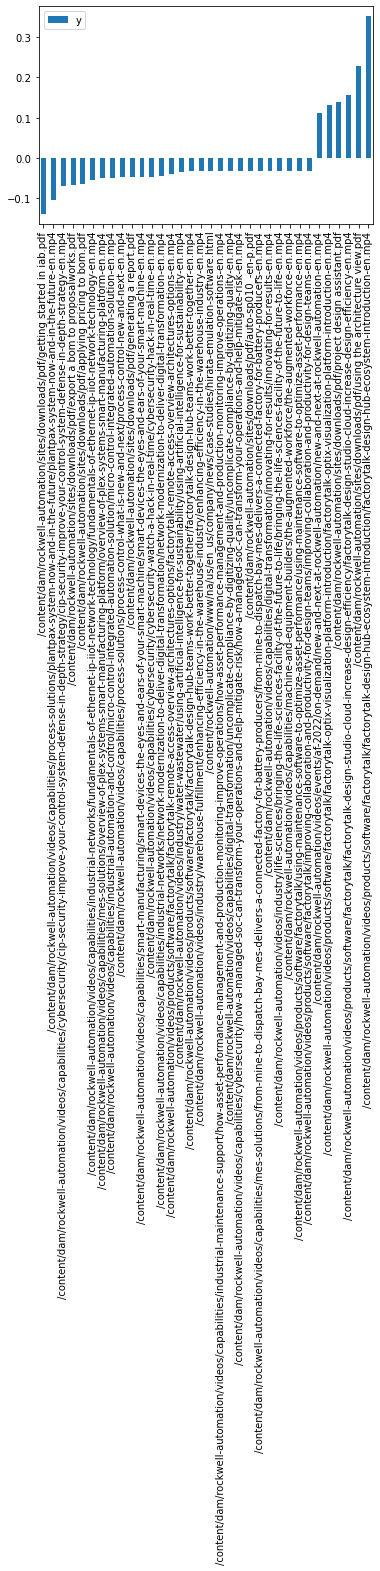

In [447]:
mat2 = pd.DataFrame(np.hstack([y_train.reshape(-1,1), X_train_arr.toarray()]), columns=["y"]+vectorizer.get_feature_names())
corr = mat2.corr().iloc[1:, 0:1].sort_values("y")
corr.plot(kind="bar")
corr

## Weight Rescaling
lowest level is 1, decide which one has higher importance score. start with 1

In [399]:
x = weights["weight"].astype(float)
x.describe()

count    34.000000
mean      0.029412
std       0.032497
min       0.009442
25%       0.013610
50%       0.017022
75%       0.027702
max       0.154958
Name: weight, dtype: float64

### Three levels (prefer)

In [408]:
xx = pd.concat([weights["asset"], x, pd.cut(x, 3)], axis=1)
xx.columns = ["asset", "weight", "bins"]
xx["bins"] = xx["bins"].map(lambda x: f"[{str(x.left)}, {str(x.right)}]")
bin_dict = sorted(xx["bins"].unique().tolist())

colors = dict(zip(bin_dict, ['lightskyblue', 'turquoise', 'orange']))
labels = dict(zip(bin_dict, range(1, len(bin_dict)+1)))

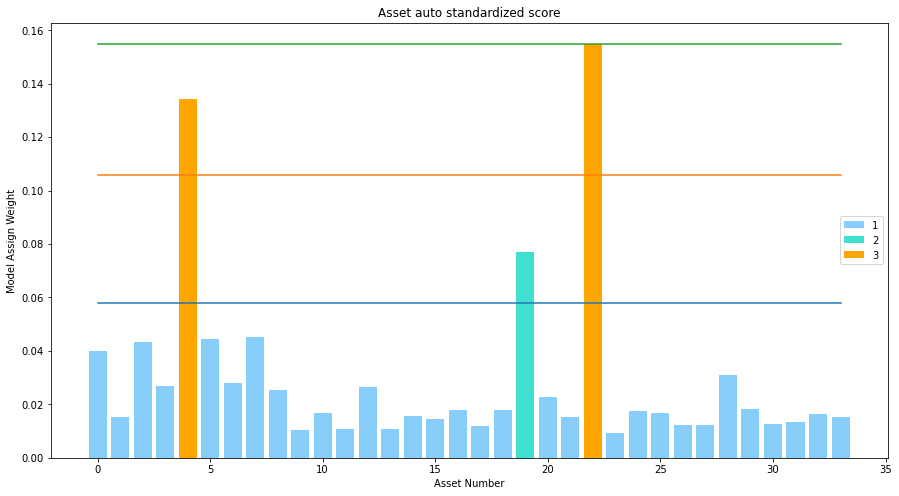

In [409]:
xx["color"] = xx["bins"].apply(lambda x: colors[x])
xx["auto_score"] = xx["bins"].apply(lambda x: labels[x])

plt.figure(figsize=(15,8))

for idx, item in xx.groupby("bins"):
    plt.bar(x=item.index, height = item["weight"], color=item["color"], label=item["auto_score"].iloc[0])

for pair in bin_dict:
    upper_line = eval(pair)[1]
    plt.plot([0, xx.index[-1]],[upper_line,upper_line])

    
plt.xlabel("Asset Number")
plt.ylabel("Model Assign Weight")
plt.title("Asset auto standardized score")
plt.legend()
plt.show()

In [414]:
xx[["asset", "auto_score"]]

,asset,auto_score
0,/content/dam/rockwell-automation/sites/downloa...,1
1,/content/dam/rockwell-automation/sites/downloa...,1
2,/content/dam/rockwell-automation/sites/downloa...,1
3,/content/dam/rockwell-automation/sites/downloa...,1
4,/content/dam/rockwell-automation/sites/downloa...,3
5,/content/dam/rockwell-automation/sites/downloa...,1
6,/content/dam/rockwell-automation/sites/downloa...,1
7,/content/dam/rockwell-automation/videos/capabi...,1
8,/content/dam/rockwell-automation/videos/capabi...,1
9,/content/dam/rockwell-automation/videos/capabi...,1


### min-max Normalization

<AxesSubplot:>

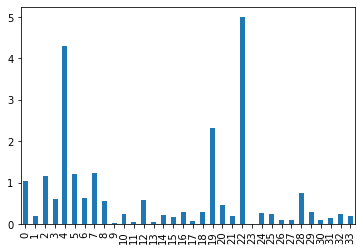

In [334]:
x = weights["weight"].astype(float) 
x = (x-x.min())/(x.max()-x.min()) * 5
x.plot(kind="bar")

### z-score Standardization

<AxesSubplot:>

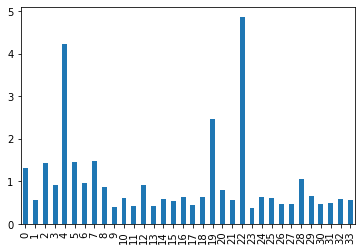

In [339]:
x = weights["weight"].astype(float) 
x = 1 + ((x-x.mean())/x.std())
x.plot(kind="bar")

## Others 

### Sample Size estimation
Assumption
- Binomial Distribution

Testing
- Power = 1 - Type II Error
- Pr(True Positive) = 1 - Pr(False Negative)

<img src="https://sigmazone.com/wp-content/uploads/2018/06/Normal_Approx_Binomial_CI.gif" width="500"/>

In [84]:
from scipy.stats import norm

In [85]:
# estimate sample size via power analysis
# from statsmodels.stats.power import TTestIndPower

# # parameters for power analysis
# effect = 0.8
# alpha = 0.05
# power = 0.8
# # perform power analysis
# analysis = TTestIndPower()
# result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
# print('Sample Size: %.3f' % result)

In [95]:
n = 83
pos = 6
p_hat = pos/n
print(p_hat)

0.07228915662650602


#### CI with given N

In [96]:
alpha = .10

def get_CI(p_hat, n, alpha):
    ppf_list = norm.ppf(q=[alpha/2, 1-alpha/2], loc=0, scale=1)
    z_quantile = ppf_list[1]

    variance = p_hat * (1-p_hat)
    deviation = np.sqrt(p_hat * (1-p_hat)/n)
    CI_lower = p_hat - z_quantile * deviation
    CI_upper = p_hat + z_quantile * deviation
#     print("alpha level: ", alpha)
#     print("p_hat", p_hat)
    # print("z_quantile: ", z_quantile)
    # print("deviation: ", deviation)
#     print(f"CI: [{CI_lower}, {CI_upper}]")
    return [alpha, CI_lower, CI_upper, deviation, variance]

CI_list = []
for alpha in range(1, 11):
    CI_list.append(get_CI(p_hat, n, alpha/100))
CI_df = pd.DataFrame(CI_list, columns=["alpha", "CI_lower", "CI_upper", "deviation", "variance"])
CI_df

,alpha,CI_lower,CI_upper,deviation,variance
0,0.01,-0.000929,0.145508,0.028425,0.067063
1,0.02,0.006162,0.138416,0.028425,0.067063
2,0.03,0.010604,0.133974,0.028425,0.067063
3,0.04,0.013911,0.130667,0.028425,0.067063
4,0.05,0.016577,0.128002,0.028425,0.067063
5,0.06,0.018827,0.125751,0.028425,0.067063
6,0.07,0.020785,0.123793,0.028425,0.067063
7,0.08,0.022526,0.122053,0.028425,0.067063
8,0.09,0.024097,0.120481,0.028425,0.067063
9,0.10,0.025534,0.119044,0.028425,0.067063


#### required sample with given CI

In [166]:
CI_length = 0.04
# CI_length = p_hat * 0.3
alpha = 0.05
ppf_list = norm.ppf(q=[alpha/2, 1-alpha/2], loc=0, scale=1)
z_quantile = ppf_list[1]
required_num = 1 / (((CI_length/2)/z_quantile)**2 / (p_hat * (1-p_hat)))
print(f"given CI_length: {round(CI_length,4)}, alpha {alpha},  p_hat {round(p_hat,4)} ")
print(f"If required target CI: [{round(p_hat-CI_length/2,4)}, {round(p_hat+CI_length/2,4)}]")
print(f"required_numbers: {int(required_num)+1}")

given CI_length: 0.04, alpha 0.05,  p_hat 0.0723 
If required target CI: [0.0523, 0.0923]
required_numbers: 645


### clustering based 
- how to estimated the probablity of some attributes
- how to assign weight based on this?

# Store model and prediction

In [325]:
with open('model_v1.pkl','wb') as f:
    pickle.dump(clf, f)

In [327]:
# load
with open('model_v1.pkl', 'rb') as f:
    clf2 = pickle.load(f)

# Post to AEM

In [333]:
np.exp(clf2.feature_log_prob_[0])

array([0.04001147, 0.01523314, 0.04324063, 0.02677011, 0.13427545,
       0.0446054 , 0.02801266, 0.04513634, 0.02542893, 0.01029525,
       0.01667102, 0.0106694 , 0.02639518, 0.0106694 , 0.01581999,
       0.0143877 , 0.01781915, 0.01179184, 0.01791483, 0.07706646,
       0.02283726, 0.01529411, 0.1549575 , 0.00944157, 0.01737336,
       0.01661268, 0.01210651, 0.01229071, 0.03117376, 0.01825122,
       0.01247724, 0.0133506 , 0.01638599, 0.01523314])

# Checking

In [159]:
a = crm_lead[crm_lead["emailaddress1"].str.contains("123.com")]
a["emailaddress1"].sort_values()

231639.0         kenneth@123.com
231843.0           steve@123.com
169379.0    ttevis@tcsllc123.com
170792.0       xindongli@123.com
196003.0       xindongli@123.com
Name: emailaddress1, dtype: object